*Group Members*: 
- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo (yeq42hip) 

# Project 2: Support Vector Machines (SVM) and Kernels
## This Project gives extra points for the final grade

## **Due 18.12.2025, 16:00**

## Overview

### **Submit your project solution as a group of 2-4 people.**

In this project, you will implement and train a **Support Vector Machine (SVM)** classifier on a real-world dataset. The focus is on understanding the kernel trick, the dual SVM formulation, and how kernel parameters affect classification performance.

### Dataset
You will work with the following dataset:

**MAGIC Gamma Telescope Dataset**
- Classification task: Distinguish gamma rays (signal) from hadronic showers (background)
- 10 continuous features (Hillas parameters from Cherenkov telescope images)
- ~19,000 samples

### Tasks

1. **Data Loading and Preprocessing** (1 Point)

2. **Implement Kernel Function** (1 Point)

3. **Implement SVM Class** (1.5 Points)

4. **Hyperparameter Tuning** (0.5 Points)

5. **Visualization** (0.5 Points)

6. **Testing & Evaluation** (0.5 Points)

### **For full points you need to achieve at least 87% accuracy on the testing set**

### **NOTE**: 
#### You are not allowed to use sklearn, pytorch or similar Deep Learning frameworks. Numpy is allowed.

**(1) Data Loading and Preprocessing: 1 Point**

Load the MAGIC Gamma Telescope dataset and prepare it for SVM training. Key preprocessing steps include:

- **Loading**
- **Exploration**
- **Encoding**
- **Normalization**
- **Splitting**: Create train/test splits (80%/20%)

In [9]:
# TODO: (1) Data Loading and Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# ============================================
# Load MAGIC Gamma Telescope Dataset
# ============================================
feature_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]

# Load dataset (no header in file)
magic_df = pd.read_csv(
    "magic04data.sec",
    header=None,
    names=feature_names
)
            

print("MAGIC Gamma Telescope Dataset:")
print(f"Shape: {magic_df.shape}")
print(f"\nClass distribution:\n{magic_df['class'].value_counts()}")
print(f"\nFeature statistics:\n{magic_df.describe()}")

# ============================================
#TODO: Preprocessing MAGIC Dataset
# ============================================
#TODO: Encode labels
magic_df["class"] = magic_df["class"].map({"g": 1, "h": -1})

#TODO: Extract features and labels
X_magic = magic_df.drop(columns=["class"]).values
y_magic = magic_df["class"].values

# ============================================
#TODO: Standardization/Normalize Function
# ============================================
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0) + 1e-8  
    return (X - mean) / std
    

# ============================================
# Train/Test Split Function (80%/20%)
# ============================================
def train_test_split(X, y, train_ratio=0.8, seed=42):
    """
    Split data into train and test sets.
    """
    np.random.seed(seed)
    n = len(y)
    indices = np.random.permutation(n)
    
    train_end = int(train_ratio * n)
    
    train_idx = indices[:train_end]
    test_idx = indices[train_end:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# ============================================
#TODO: Split and Standardize MAGIC Dataset
# ============================================
X_train_magic, X_test_magic, y_train_magic, y_test_magic = train_test_split(
    X_magic, y_magic, train_ratio=0.8, seed=SEED
)

# Standardize
X_train_magic = standardize(X_train_magic)
X_test_magic = standardize(X_test_magic)

# Create validation set from test split
split_idx = len(y_test_magic) // 2
X_val_magic = X_test_magic[:split_idx]
y_val_magic = y_test_magic[:split_idx]
X_test_magic = X_test_magic[split_idx:]
y_test_magic = y_test_magic[split_idx:]


print("\n" + "="*50)
print("MAGIC Dataset Split (80/20):")
print(f"Training set: {X_train_magic.shape[0]} samples")
print(f"Test set: {X_test_magic.shape[0]} samples")

MAGIC Gamma Telescope Dataset:
Shape: (19020, 11)

Class distribution:
g    12332
h     6688
Name: class, dtype: int64

Feature statistics:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.0

**(2) Implement Kernel Functions: 1 Point**

The kernel trick allows SVMs to learn non-linear decision boundaries by implicitly mapping data to higher-dimensional spaces. Decide which kernel function to implement.

In [10]:
# TODO: Implement Kernel Function of your choice
def rbf_kernel(X, Y, gamma=0.1):
    X_norm = np.sum(X**2, axis=1).reshape(-1, 1)
    Y_norm = np.sum(Y**2, axis=1).reshape(1, -1)
    
    # Squared Euclidean distance
    dist_sq = X_norm + Y_norm - 2 * np.dot(X, Y.T)
    
    # Clip small negative values
    dist_sq = np.maximum(dist_sq, 0)
    
    return np.exp(-gamma * dist_sq)


# Test the kernel functions
print("Testing kernel functions...")
X_test_k = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_k = np.array([[1, 1], [2, 2]])

K_test = rbf_kernel(X_test_k, Y_test_k, gamma=0.5)

#TODO: print kernel shapes and values
print(f"kernel shape: {K_test.shape}")
print(f"kernel values:\n{K_test}")

Testing kernel functions...
kernel shape: (3, 2)
kernel values:
[[6.06530660e-01 6.06530660e-01]
 [1.50343919e-03 8.20849986e-02]
 [1.25015287e-09 3.72665317e-06]]


**(3) Implement SVM Class: 1.5 Points**

Implement the **Dual SVM formulation** using projected gradient descent. The dual formulation is necessary for the kernel trick, as it allows us to work with the Lagrange multipliers $\alpha$ instead of the weight vector $w$ directly.

In [11]:
# ============================================
# TODO: DUAL SVM FORMULATION
# ============================================
# We solve the dual optimization problem using projected gradient descent.
# The dual is necessary for the kernel trick.
# ============================================

def dual_objective(alpha, K, y):
    return np.sum(alpha) - 0.5 * np.sum((alpha * y)[:, None] * (alpha * y)[None, :] * K)


def dual_gradient(alpha, K, y):
    return np.ones_like(alpha) - (K @ (alpha * y)) * y


def project_onto_constraints(alpha, y, C):
    alpha = np.clip(alpha, 0, C)  # enforce 0 ≤ alpha ≤ C
    correction = np.dot(alpha, y) / np.dot(y, y)
    alpha -= correction * y
    return np.clip(alpha, 0, C)


class SVM:

    def __init__(self, kernel, C=1.0, gamma=0.1, lr=1e-3, epochs=200):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y, graph=False):
        self.X_train = X
        self.y_train = y
        n_samples = X.shape[0]

        # Compute kernel matrix
        K = self.kernel(X, X, gamma=self.gamma)

        # Initialize Lagrange multipliers
        self.alpha = np.zeros(n_samples)
        self.loss_history = []

        # Projected gradient ascent
        for _ in range(self.epochs):
            grad = dual_gradient(self.alpha, K, y)
            self.alpha += self.lr * grad
            self.alpha = project_onto_constraints(self.alpha, y, self.C)
            self.loss_history.append(dual_objective(self.alpha, K, y))

        # Bias term
        sv_mask = (self.alpha > 1e-6) & (self.alpha < self.C)
        
        if np.any(sv_mask):
            self.b = np.mean(
                y[sv_mask] - (K[sv_mask] @ (self.alpha * y))
            )
        else:
            self.b = 0.0
        
            
        if graph:
            n_sv = np.sum(self.alpha > 1e-6)
            # Calculate final training accuracy
            alpha_y = self.alpha * y
            f = K @ alpha_y + self.b
            y_pred = np.sign(f)
            train_acc = np.mean(y == y_pred)
            print(f"\nTraining complete!")
            print(f"Number of support vectors: {n_sv} ({100*n_sv/n_samples:.1f}%)")
            print(f"Final Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
            
            plt.figure(figsize=(10, 5))
            plt.plot(self.loss_history)
            plt.xlabel('Epoch')
            plt.ylabel('Dual Objective')
            plt.title('Dual Objective Over Training (should increase)')
            plt.grid(True)
            plt.show()
        
        return self

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        - X: Features to predict (m, n_features)
        
        Returns:
        - predictions: Array of predictions (-1 or 1)
        """
        K = self.kernel(X, self.X_train, gamma=self.gamma)
        alpha_y = self.alpha * self.y_train
        f = K @ alpha_y + self.b
        return np.sign(f)
    


def accuracy(y_true, y_pred):
    """Calculate classification accuracy."""
    return np.mean(y_true == y_pred)


# ============================================
# Test the DUAL SVM implementation
# ============================================
print("Testing DUAL SVM implementation...")
X_small = X_train_magic[:600]
y_small = y_train_magic[:600]

# TODO: Create and train SVM on small subset
svm_test = SVM(kernel=rbf_kernel, C=1.0, lr=1e-3, epochs=200)
svm_test.fit(X_small, y_small)

y_pred = svm_test.predict(X_test_magic)

test_acc = accuracy(y_test_magic, y_pred)
print(f"\nTest accuracy on subset: {test_acc:.4f}")

Testing DUAL SVM implementation...

Test accuracy on subset: 0.8233


**(4) Hyperparameter Tuning: 0.5 Points**

SVM performance heavily depends on the choice of hyperparameters. Implement a grid search to find the best combination of hyperparameters.

Use the test set to evaluate different hyperparameter combinations and select the best performing ones.

In [12]:
#TODO: Define hyperparameter search space

C_values = [0.8, 1.0, 1.2]
gamma_values = [0.12, 0.14, 0.16, 0.18]
lr_values = [0.001]
epoch_values = [400]

def grid_search(X_train, y_train, X_val, y_val, kernel):
    best_acc = 0.0
    best_params = None

    for C in C_values:
        for gamma in gamma_values:
            for lr in lr_values:
                for epochs in epoch_values:
                    svm = SVM(
                        kernel=kernel,
                        C=C,
                        gamma=gamma,
                        lr=lr,
                        epochs=epochs
                    )

                    svm.fit(X_train, y_train)
                    y_pred = svm.predict(X_val)
                    acc = accuracy(y_val, y_pred)
                    print(f"C:{C},gamma:{gamma},lr:{lr},epochs:{epochs},accuracy:{acc}")
                    if acc > best_acc:
                        best_acc = acc
                        best_params = {
                            "C": C,
                            "gamma": gamma,
                            "lr": lr,
                            "epochs": epochs
                        }

    return best_params, best_acc

**(5) Visualization: 0.5 Points**

Create visualizations to understand your SVM models:

1. **Loss Curves**: Plot the dual objective value over training epochs to monitor convergence
2. **Accuracy Comparison**: Create bar charts comparing model performance

In [13]:
def plot_loss_comparison(loss_histories, labels):
    """
    Plot multiple loss curves for comparison.
    """
    plt.figure(figsize=(12, 6))
    for loss_history, label in zip(loss_histories, labels):
        plt.plot(loss_history, label=label, linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Dual Objective')
    plt.title("MAGIC Dataset - Training Loss Curve")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_accuracy_comparison(accuracies, model_names):
    """
    Bar chart comparing accuracies of different models.
    """
    plt.figure(figsize=(8, 6))
    colors = ['#3498db', '#2ecc71']
    bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')
    
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.2%}', ha='center', va='bottom', fontsize=12)
    
    plt.ylim(0, 1.1)
    plt.ylabel('Accuracy')
    plt.title(f'Kernel Comparison')
    plt.axhline(y=0.87, color='red', linestyle='--', label='Target: 87%')
    plt.legend()
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()

In [14]:
# ============================================
# TODO: Grid Search for MAGIC Dataset; Report Best Hyperparameters
# ============================================
print("="*60)
print("MAGIC DATASET - Hyperparameter Tuning")
print("="*60)

# Subsample training data for grid search
X_gs = X_train_magic[:4000]
y_gs = y_train_magic[:4000]

# Grid search
best_params, best_val_acc = grid_search(
    X_gs,
    y_gs,
    X_val_magic,
    y_val_magic,
    rbf_kernel
)

print(f"Best validation accuracy: {best_val_acc:.4f}")
print(f"Best hyperparameters: {best_params}")

MAGIC DATASET - Hyperparameter Tuning
C:0.8,gamma:0.12,lr:0.001,epochs:400,accuracy:0.8580441640378549
C:0.8,gamma:0.14,lr:0.001,epochs:400,accuracy:0.8575184016824395
C:0.8,gamma:0.16,lr:0.001,epochs:400,accuracy:0.8575184016824395
C:0.8,gamma:0.18,lr:0.001,epochs:400,accuracy:0.8569926393270242
C:1.0,gamma:0.12,lr:0.001,epochs:400,accuracy:0.8575184016824395
C:1.0,gamma:0.14,lr:0.001,epochs:400,accuracy:0.8590956887486856
C:1.0,gamma:0.16,lr:0.001,epochs:400,accuracy:0.8569926393270242
C:1.0,gamma:0.18,lr:0.001,epochs:400,accuracy:0.8564668769716088
C:1.2,gamma:0.12,lr:0.001,epochs:400,accuracy:0.8575184016824395
C:1.2,gamma:0.14,lr:0.001,epochs:400,accuracy:0.8590956887486856
C:1.2,gamma:0.16,lr:0.001,epochs:400,accuracy:0.8569926393270242
C:1.2,gamma:0.18,lr:0.001,epochs:400,accuracy:0.8564668769716088
Best validation accuracy: 0.8591
Best hyperparameters: {'C': 1.0, 'gamma': 0.14, 'lr': 0.001, 'epochs': 400}


VISUALIZATION - Training Loss Curve

Training complete!
Number of support vectors: 15539 (90.8%)
Final Training Accuracy: 0.8775 (87.75%)


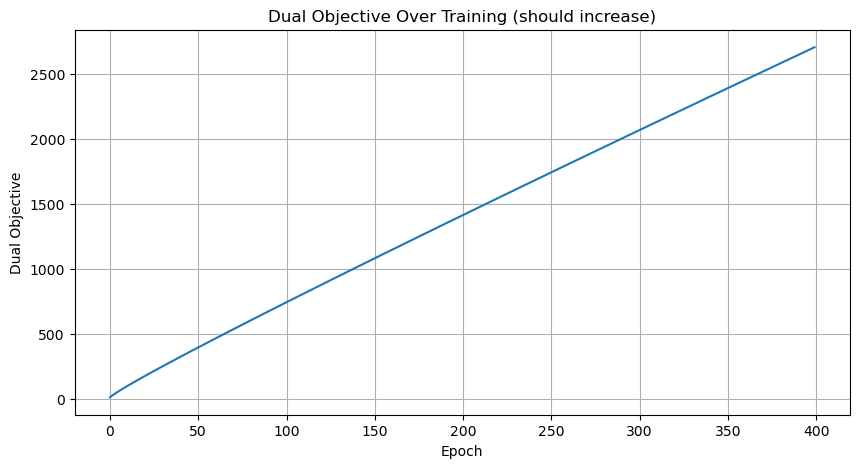

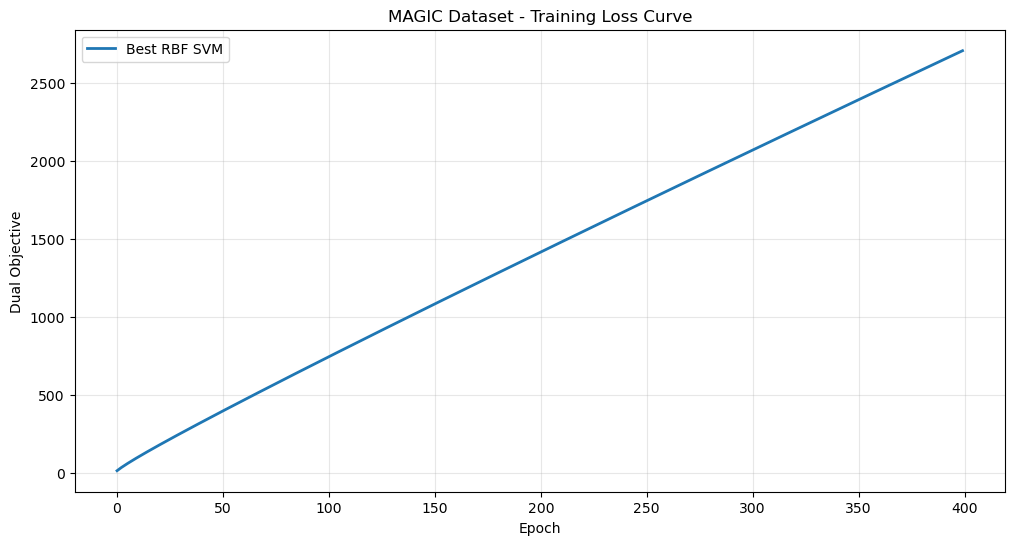

In [15]:
# ============================================
# TODO: Retrain Best Model and Visualize
# ============================================

print("="*60)
print("VISUALIZATION - Training Loss Curve")
print("="*60)

X_train_full = np.vstack([X_train_magic, X_val_magic])
y_train_full = np.concatenate([y_train_magic, y_val_magic])

best_svm = SVM(
    kernel=rbf_kernel,
    C=best_params["C"],
    gamma=best_params["gamma"],
    lr=best_params["lr"],
    epochs=best_params["epochs"]
)

best_svm.fit(X_train_full, y_train_full, graph=True)

# Plot training loss
plot_loss_comparison(
    [best_svm.loss_history],
    ["Best RBF SVM"]
)

**(6) Testing & Evaluation: 0.5 Points**

Evaluate your trained SVM model on the test set:

1. Test your SVM on the MAGIC dataset
2. Report accuracy
3. Verify that you achieve at least **87% accuracy** on the test set
4. Discuss your results and the effect of hyperparameters

MAGIC Gamma Telescope Dataset - Test Results
Test Accuracy: 0.8743


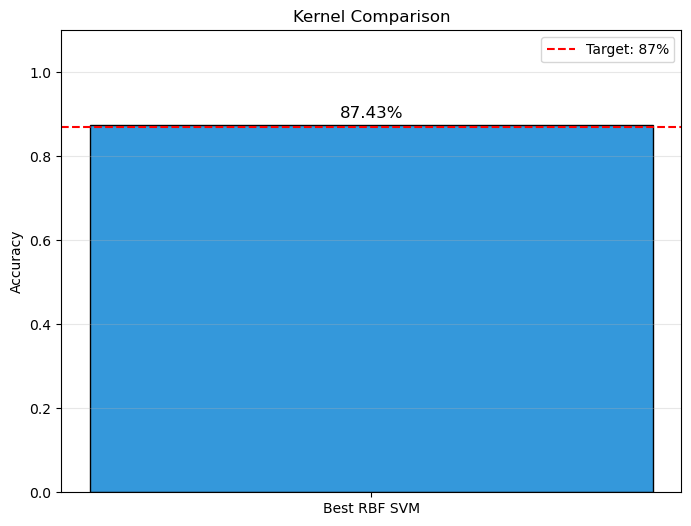


SUMMARY

MAGIC Gamma Telescope Dataset:
  - Result:     87.43% ✓ PASSED


In [16]:
# TODO: (6) Test your model on the test set

#TODO:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy(y_test, y_pred)

# ============================================
# Evaluate on MAGIC Gamma Telescope Dataset
# ============================================
print("=" * 60)
print("MAGIC Gamma Telescope Dataset - Test Results")
print("=" * 60)

#TODO:
acc_magic = evaluate_model(best_svm, X_test_magic, y_test_magic)
print(f"Test Accuracy: {acc_magic:.4f}")

#TODO:
plot_accuracy_comparison(
    [acc_magic],
    ["Best RBF SVM"]
)

# ============================================
# Summary
# ============================================
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)

print("\nMAGIC Gamma Telescope Dataset:")
print(f"  - Result:     {acc_magic:.2%} {'✓ PASSED' if acc_magic >= 0.87 else '✗ Below 87% target'}")

# TODO:
Discuss your results and the effect of hyperparameters here.

We adjusted the four hyper parameters: C as the upper bound of the constraints projection, epochs as the number of iterations when fitting,  gamma as the coeeficient of the RBF Kernel, and the learning rate. At first C led the highest accuracy when it is set larger than 20, and didn't get higher by increasing it further. However, when we carefully observe the effect on the final accuracy, C is found best somewhere between 0.1 and 1.0. The epochs showed optimal when it is set 400, and began to show overfitting when it is increased more than that. Gamma showed the best fitting when it is set between 0.1 and 0.2, but it also depended on the size of the training data. Learning rate appeard optimal when it is between 1e-4 and 1e-5, but also showed quite high accuracy when it's 0.01, so we observed with the comparison of gamma adjusting.

*Group Members*: 
- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo (yeq42hip) 